In [1]:
!conda install keras

/bin/bash: conda: command not found


In [106]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [169]:
X = np.array([[0],
              [1]])
T = np.array([[1],
              [0]])
print (X)
print (T)

[[0]
 [1]]
[[1]
 [0]]


In [170]:
model = Sequential()
model.add(Dense(units=1, input_dim=1)) # Dense=全結合層
model.add(Activation('sigmoid')) # 活性化関数

# 訓練プロセスの作成: 勾配法=SGD、損失関数=binary_crossentropy、評価関数：-）
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
# モデルの概要を表示
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 2         
_________________________________________________________________
activation_21 (Activation)   (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [171]:
l = model.layers[0]
print (l.get_weights())

[array([[-1.0383713]], dtype=float32), array([0.], dtype=float32)]


In [172]:
# 第1引数、第2引数: 入力データ
# batch_size: バッチサイズ。
# epochs: 訓練を行う回数を指定します。
# verbose: 指定する数値により実行ログの出す内容が変わります。
# validation_data: 評価用のデータを指定します。
# 戻り値・・・訓練の損失値と評価関数値が返ってきます。

history = model.fit(X, T, epochs=30, batch_size=1)

Epoch 1/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5047
Epoch 2/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4983
Epoch 3/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4921
Epoch 4/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4861
Epoch 5/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4801
Epoch 6/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4743
Epoch 7/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4686
Epoch 8/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4629
Epoch 9/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4574
Epoch 10/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4521
Epoch 11/30
2/2 [==============================] - 0s 1ms/step - loss: 0.4468
Epoch 12/30
2/2 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 13/30
2/2 [==============================] - 0s 2ms/step - loss: 0.

In [173]:
history

In [174]:
print (model.layers[0].get_weights())

[array([[-1.7857039]], dtype=float32), array([0.549902], dtype=float32)]


In [175]:
# 学習したモデルにXを与えた際の結果
Y = model.predict_classes(X, batch_size=1)

print (Y)
print (T==Y)

[[1]
 [0]]
[[ True]
 [ True]]


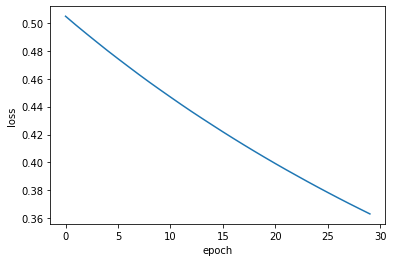

In [176]:
# 学習過程(loss)の可視化
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.5,1)
plt.show()
